<div style='text_align: center'>
<h1>Machine Learning Approach to mitbih Dataset</h1>
</div>

# Data Exploration

In [1]:
import yaml
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from summarytools import dfSummary

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

data_path = config['paths']['data']
model_path = config['paths']['model']
firgure_path = config['paths']['figure']

In [3]:
train_path = join(data_path, 'raw/mitbih_train.csv')
test_path = join(data_path, 'raw/mitbih_test.csv')
abnormal_path = join(data_path, 'external/ptbdb_abnormal.csv')
normal_path = join(data_path, 'external/ptbdb_normal.csv')

## Data Description

<h3>About Dataset</h3>

ECG Heartbeat Categorization Dataset

<h4>Abstract</h4>

This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network.

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

<h4>Content</h4>

Arrhythmia Dataset

* Number of Samples: 109446
* Number of Categories: 5
* Sampling Frequency: 125Hz
* Data Source: Physionet's MIT-BIH Arrhythmia Dataset
* Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

The PTB Diagnostic ECG Database
* Number of Samples: 14552
* Number of Categories: 2
* Sampling Frequency: 125Hz
* Data Source: Physionet's PTB Diagnostic Database

Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.

<h4>Data Files</h4>

This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs.

<h4>Acknowledgements</h4>

Mohammad Kachuee, Shayan Fazeli, and Majid Sarrafzadeh. "ECG Heartbeat Classification: A Deep Transferable Representation." arXiv preprint arXiv:1805.00794 (2018).

source: [Kaggle](https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data)

## Training data

In [4]:
import pandas as pd
import numpy as np

def prepare_data (data_path:str, dfname:str) -> pd.DataFrame:
    df = pd.read_csv(data_path, header=None)
    df.dataframeName = dfname
    return df

In [5]:
train_df = prepare_data(data_path=train_path, dfname='Training')
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [7]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
train_df.shape

(87554, 188)

In [9]:
train_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [10]:
train_df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [11]:
train_df.duplicated().sum()

0

## Testing data

In [12]:
test_df = prepare_data(test_path, 'Testing')
test_df.shape

(21892, 188)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [14]:
test_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [15]:
test_df.duplicated().sum()

0

## External Abnormal data

In [16]:
abnormal_df = prepare_data(abnormal_path, 'Abnormal')
abnormal_df.shape

(10506, 188)

In [17]:
abnormal_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [18]:
abnormal_df.duplicated().sum()

6

## External Noraml data

In [19]:
normal_df = prepare_data(normal_path, 'Normal')
normal_df.shape

(4046, 188)

In [20]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [21]:
normal_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

# Data Visualization

In [22]:
def data_distribution (df:pd.DataFrame, loops:int)->None:
    for col in range(0, loops):
        df[col].hist(bins=15, figsize=(10, 5), color='blue', edgecolor='black')
        plt.title(f'Column #{col}')
        plt.tight_layout()
        plt.show()

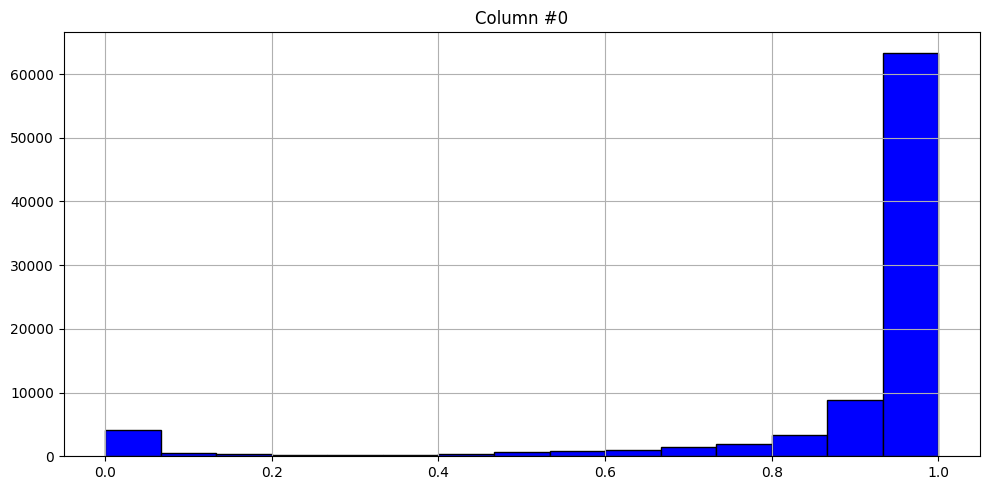

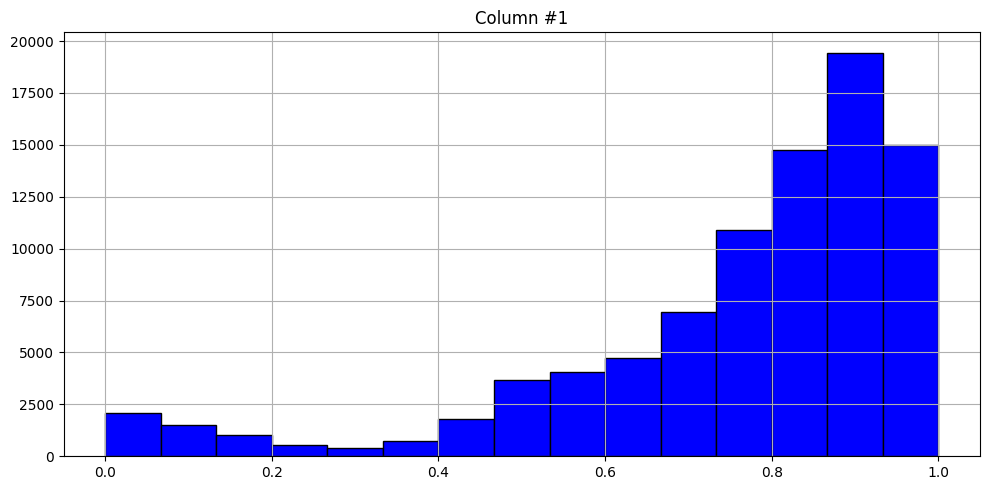

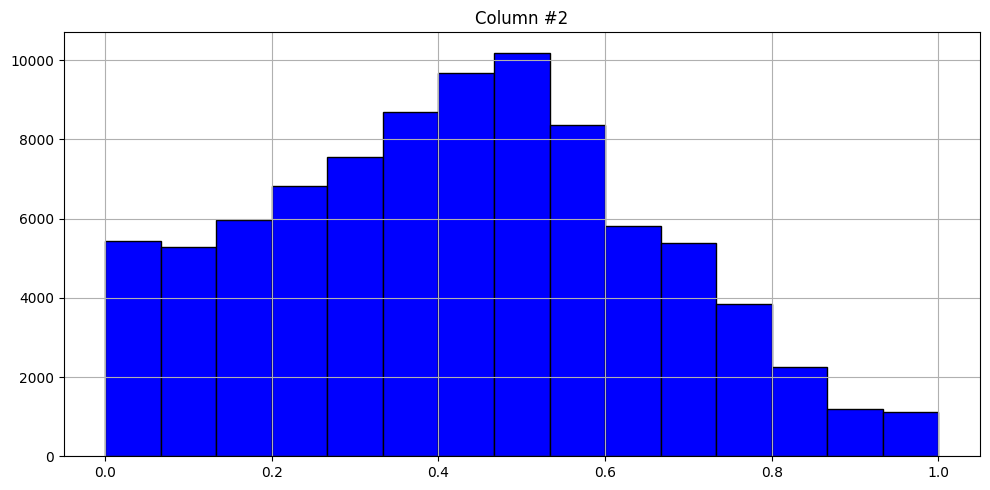

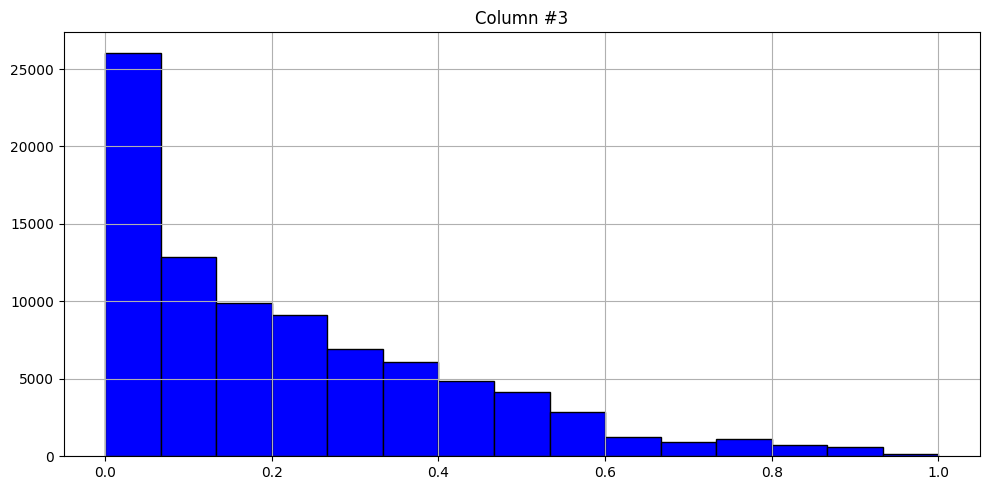

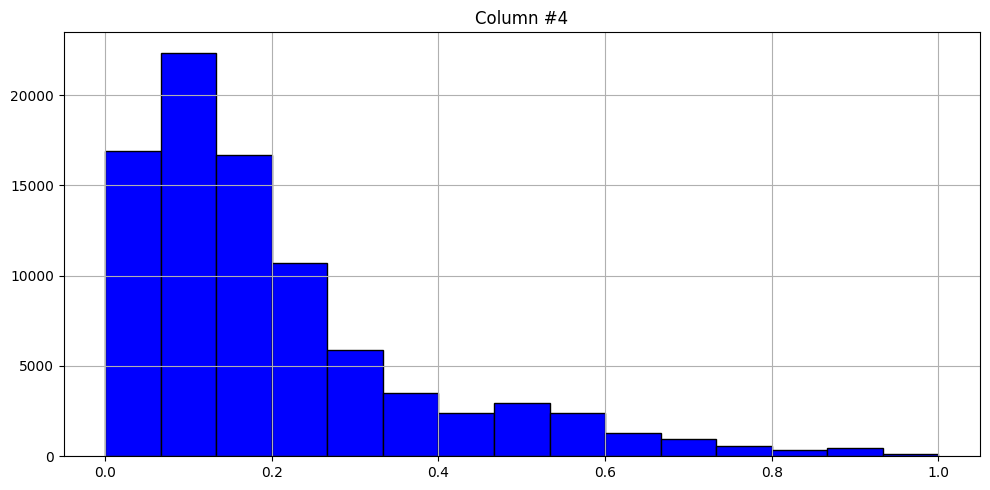

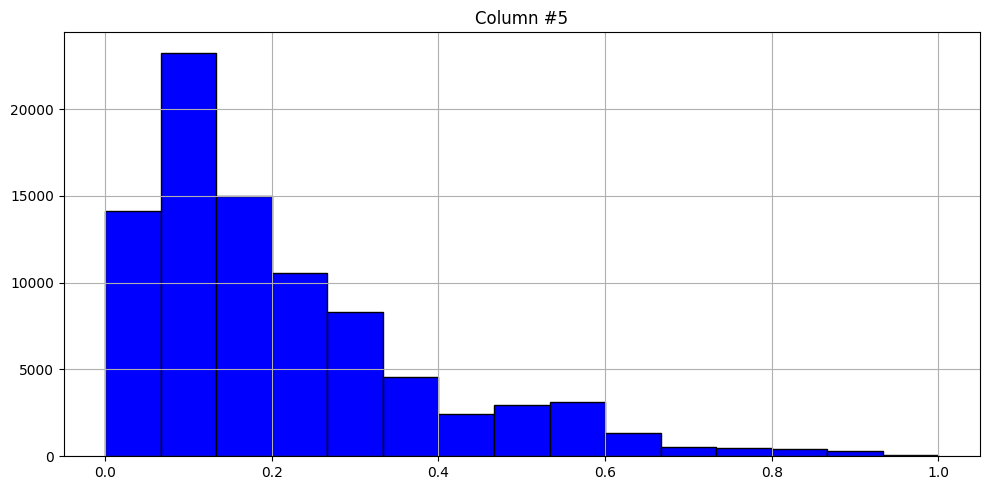

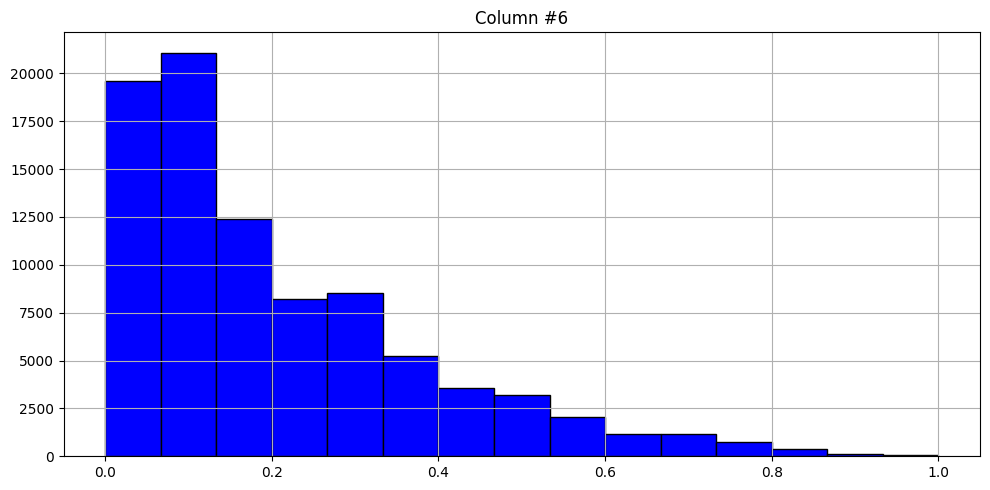

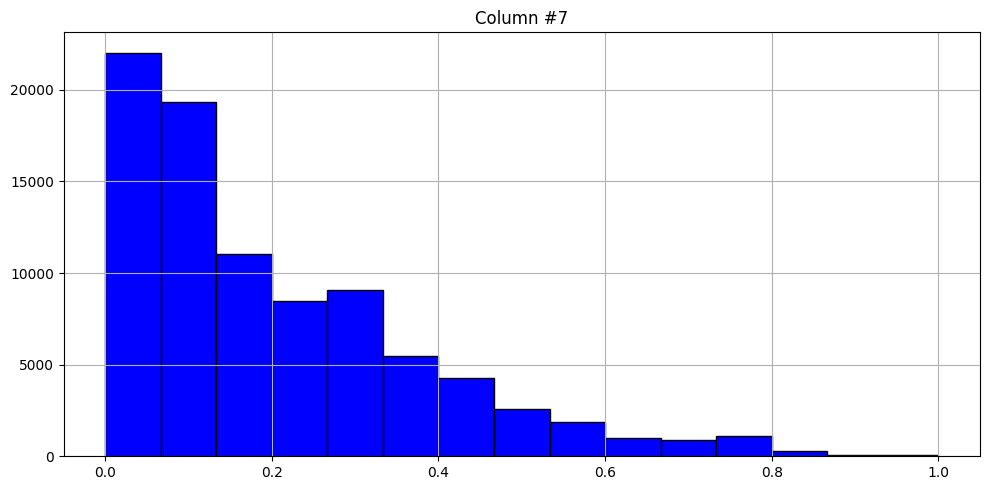

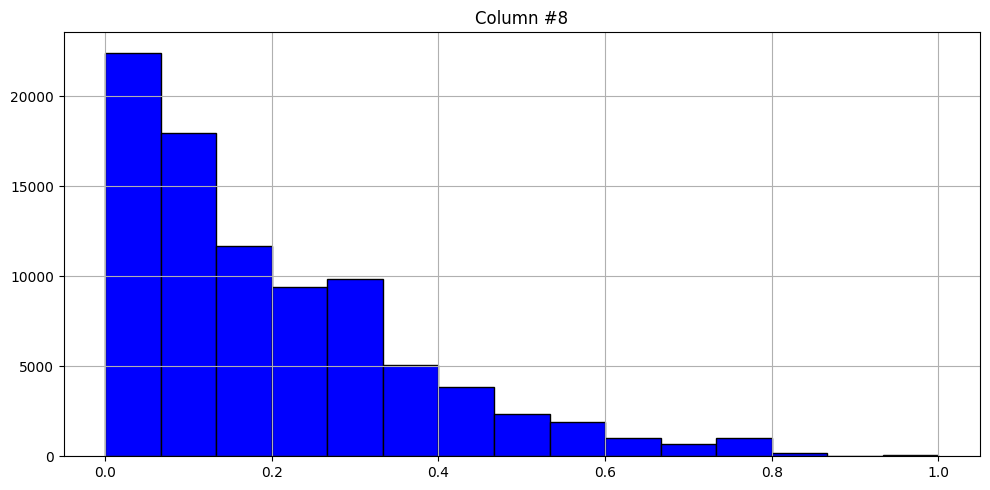

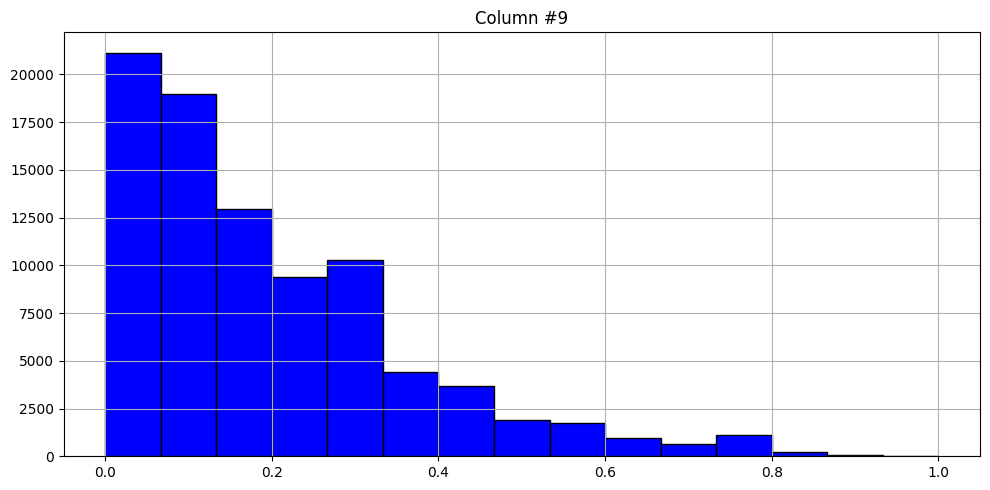

In [23]:
data_distribution(train_df, 10)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22260\1088196446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df.iloc[:, -1], palette='coolwarm')


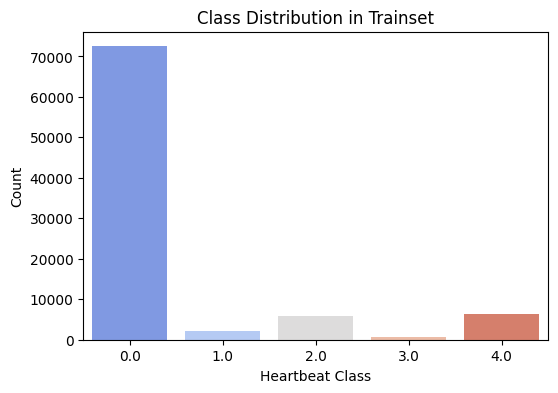

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df.iloc[:, -1], palette='coolwarm')
plt.title(f"Class Distribution in Trainset")
plt.xlabel("Heartbeat Class")
plt.ylabel("Count")
plt.savefig(join(firgure_path, 'Trainset_label_distribution.png'))
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_22260\47428424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_df.iloc[:, -1], palette='coolwarm')


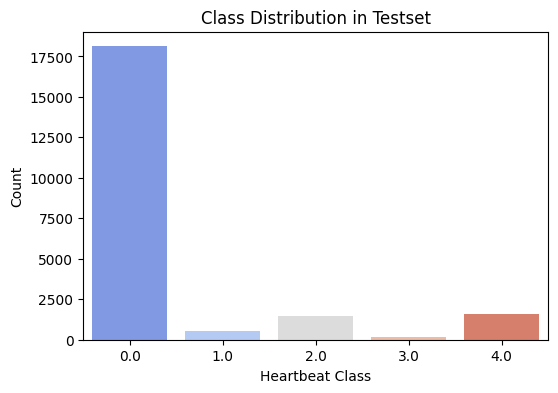

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x=test_df.iloc[:, -1], palette='coolwarm')
plt.title(f"Class Distribution in Testset")
plt.xlabel("Heartbeat Class")
plt.ylabel("Count")
plt.savefig(join(firgure_path, 'Testset_label_distribution.png'))
plt.show()

Unbalance

In [26]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

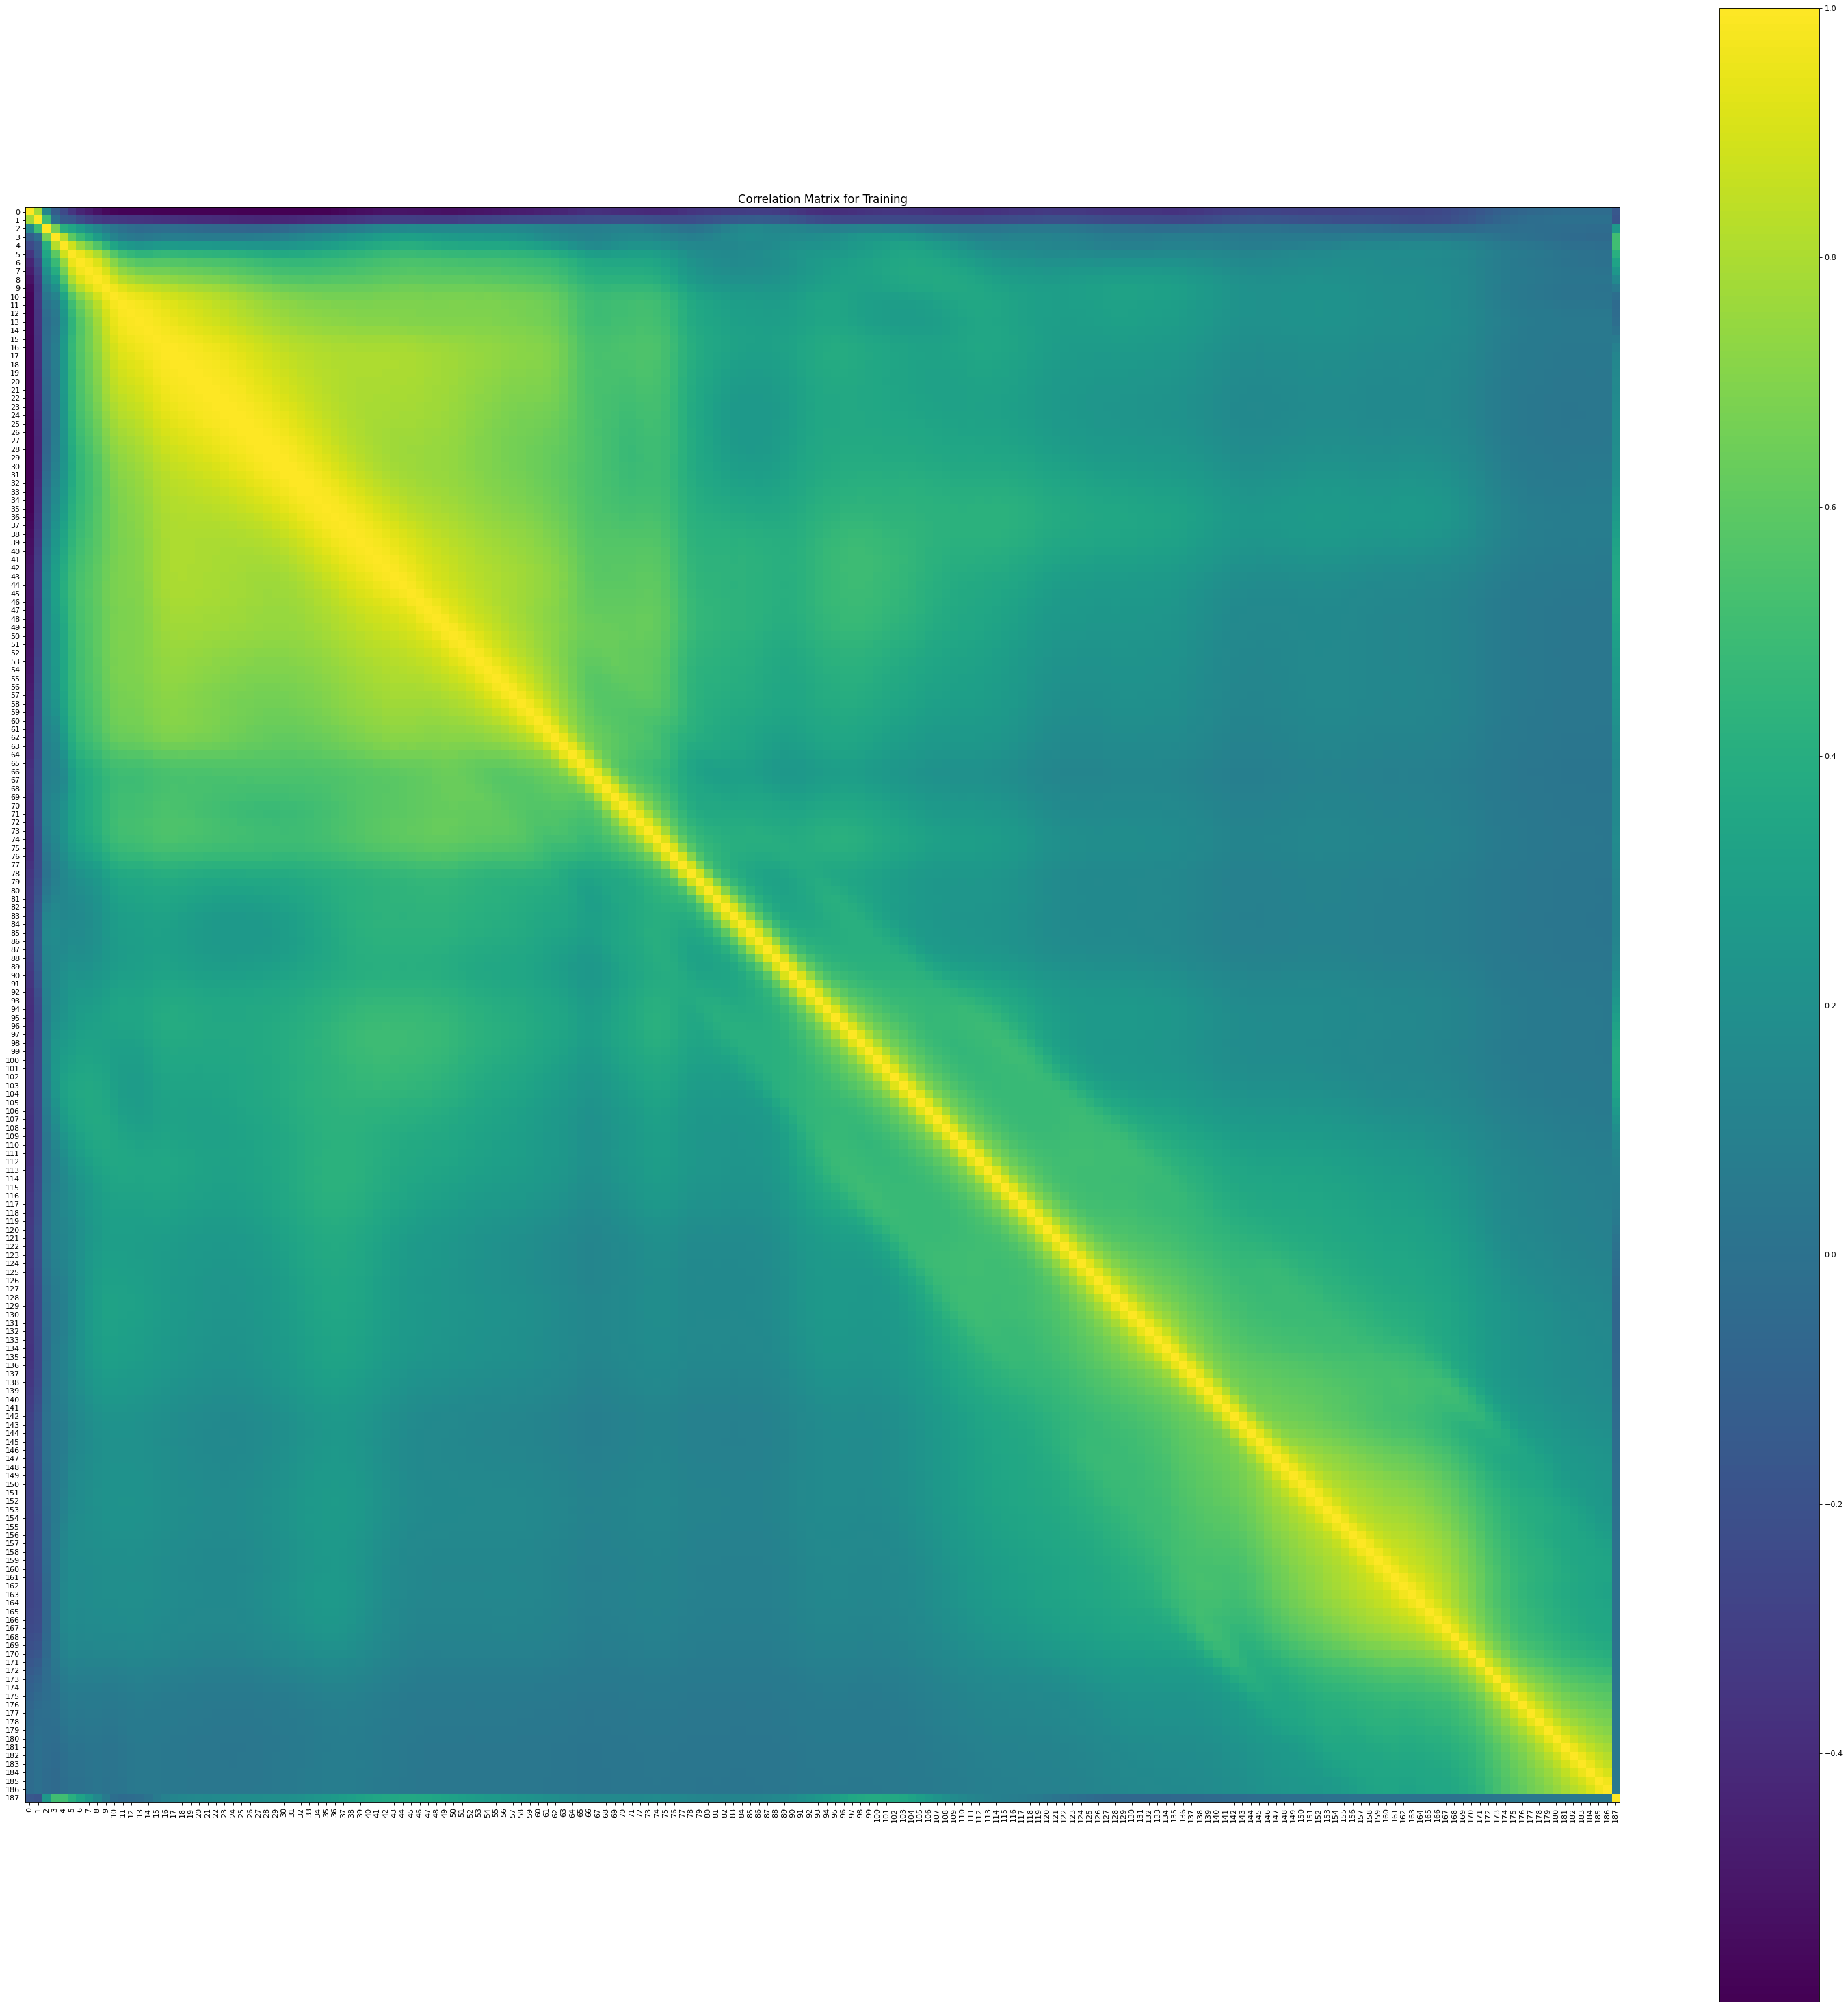

In [27]:
plotCorrelationMatrix(train_df, 47)

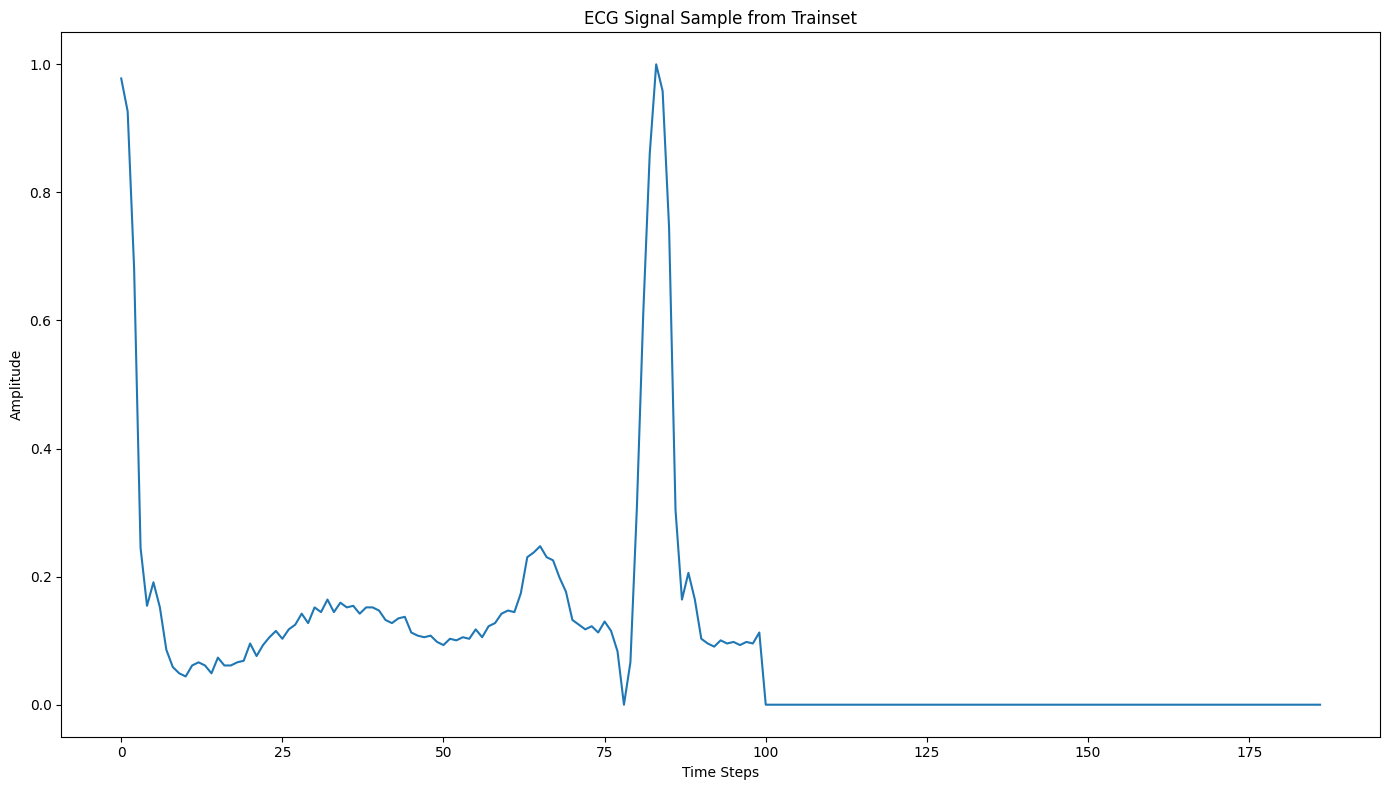

In [28]:
plt.figure(figsize=(14, 8))
plt.plot(train_df.iloc[0, :-1]) 
plt.title(f"ECG Signal Sample from Trainset")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.savefig(join(firgure_path, 'ECG_Signal_Sample_from_Trainset.png'))
plt.show()

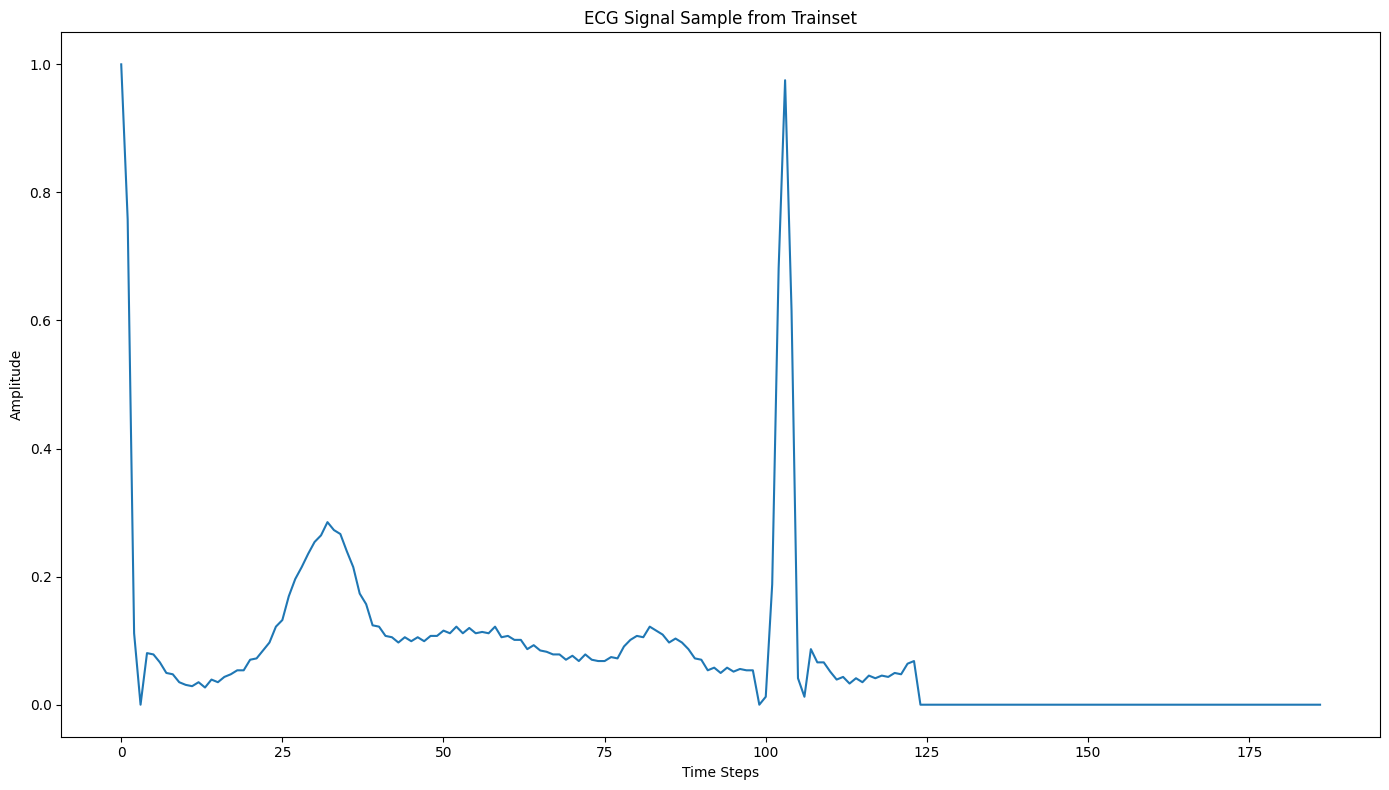

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(test_df.iloc[0, :-1]) 
plt.title(f"ECG Signal Sample from Trainset")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.savefig(join(firgure_path, 'ECG_Signal_Sample_from_Testset.png'))
plt.show()